In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import openpyxl
from sklearn.metrics import silhouette_score


In [5]:
df = pd.read_excel('/content/Online Retail.xlsx', engine='openpyxl')

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
f = df.dropna(subset=['CustomerID'])  #rows with no CustomerID
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [7]:
# Aggregate data by CustomerID for clustering
customer_df = df.groupby('CustomerID').agg(
    TotalSpending=('TotalPrice', 'sum'),
    NumPurchases=('InvoiceNo', 'nunique'),
    AvgPurchaseValue=('TotalPrice', 'mean')
).reset_index()



In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['TotalSpending', 'NumPurchases', 'AvgPurchaseValue']])


In [9]:
# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


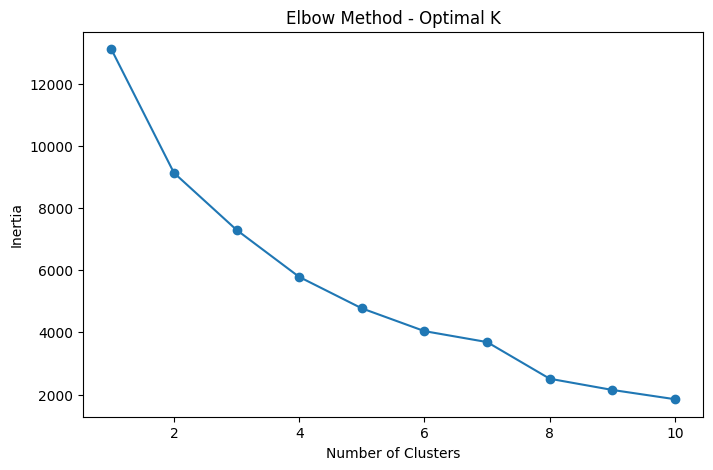

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
